In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
path_1 = Path('/Users/oleseifert/Documents/Techlabs/SoSe-21-Team-10_Main/data/raw')
df = pd.read_csv(path_1.joinpath('2000-2002.csv'), index_col='date', parse_dates=True)

# Interpolate the data

In [3]:
df_intpol = df.interpolate(method='time')
df_intpol.dropna(how='any', inplace=True)

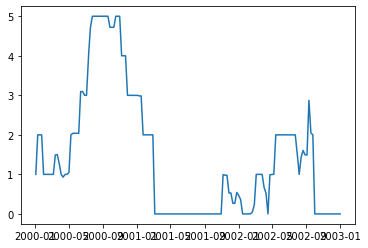

In [13]:
plt.plot(df_intpol.index, df_intpol.score)
plt.show()

# Check to see if the data is stationary

In [4]:
from statsmodels.tsa.stattools import adfuller

In [5]:
score_df = df_intpol.score

In [6]:
score_df_diff = score_df.diff().dropna()

In [38]:
# Check the 'original' data
adf_orig = adfuller(score_df)

In [39]:
print(adf_orig[0])
print(adf_orig[1])

-1.5700799194875923
0.4986036261301182


# Do differencing to make the data stationary

In [7]:
adf = adfuller(score_df_diff)

In [8]:
print(adf[0])
print(adf[1])

-5.668547321941218
9.033058726024413e-07


<AxesSubplot:xlabel='date'>

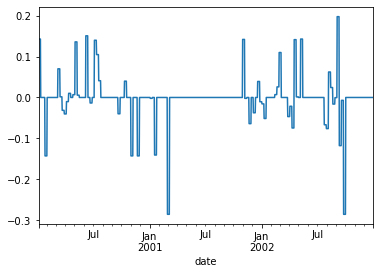

In [37]:
score_df_diff.plot()

In [9]:
from pmdarima import auto_arima
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
score_df_diff.head()

date
2000-01-05    0.142857
2000-01-06    0.142857
2000-01-07    0.142857
2000-01-08    0.142857
2000-01-09    0.142857
Name: score, dtype: float64

In [14]:
stepwise_fit = auto_arima(score_df_diff, trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-4611.478, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3149.329, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4609.703, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3926.562, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3151.049, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-4616.149, Time=0.38 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-4261.129, Time=0.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-4613.028, Time=0.25 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-4617.089, Time=0.80 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-4517.750, Time=0.49 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-4596.330, Time=0.90 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-4697.849, Time=1.08 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-4513.869, Time=0.68 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-4691.498, Time=1.17 sec
 ARIMA(1,0,5)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1092
Model:               SARIMAX(3, 0, 5)   Log Likelihood                2455.914
Date:                Thu, 22 Jul 2021   AIC                          -4893.829
Time:                        14:01:42   BIC                          -4848.867
Sample:                             0   HQIC                         -4876.813
                               - 1092                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9584      0.065     14.819      0.000       0.832       1.085
ar.L2         -0.5968      0.099     -6.023      0.000      -0.791      -0.403
ar.L3          0.2212      0.059      3.736      0.000       0.105       0.337
ma.L1         -0.2251      0.062     -3.630      0.000      -0.347      -0.104
ma.L2          0.7851      0.051     15.420      0.000       0.685       0.885
ma.L3          0.2048      0.069      2.948      0.003       0.069       0.341
ma.L4          0.3737      0.038      9.892      0.000       0.300       0.448
ma.L5          0.5151      0.053      9.776      0.000       0.412       0.618
sigma2         0.0006   4.67e-06    119.883      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   2.94   Jarque-Bera (JB):             88212.74
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                            -2.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        46.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
from statsmodels.tsa.arima_model import ARIMA

# Split data into train and test set

In [17]:
score_df_diff.shape

(1092,)

In [20]:
train = score_df_diff.iloc[:764]
test = score_df_diff.iloc[764:]

In [23]:
model = ARIMA(score_df_diff, order=(3,0,5))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  score   No. Observations:                 1092
Model:                     ARMA(3, 5)   Log Likelihood                2486.876
Method:                       css-mle   S.D. of innovations              0.025
Date:                Thu, 22 Jul 2021   AIC                          -4953.753
Time:                        14:06:26   BIC                          -4903.795
Sample:                    01-05-2000   HQIC                         -4934.847
                         - 12-31-2002                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0008      0.005     -0.166      0.868      -0.011       0.009
ar.L1.score     0.8781      0.034     25.675      0.000       0.811       0.945
ar.L2.score    -0.5949      0.042    -14.328      0.000      -0.676      -0.514
ar.L3.score     0.2630      0.033      8.091      0.000       0.199       0.327
ma.L1.score    -0.1306      0.021     -6.147      0.000      -0.172      -0.089
ma.L2.score     0.9076        nan        nan        nan         nan         nan
ma.L3.score     0.1691      0.026      6.513      0.000       0.118       0.220
ma.L4.score     0.4612      0.016     29.058      0.000       0.430       0.492
ma.L5.score     0.6715      0.001    597.654      0.000       0.669       0.674
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6399           -0.0000j            1.6399           -0.0000
AR.2            0.3111           -1.4906j            1.5227           -0.2173
AR.3            0.3111           +1.4906j            1.5227            0.2173
MA.1            0.6232           -0.7821j            1.0000           -0.1429
MA.2            0.6232           +0.7821j            1.0000            0.1429
MA.3           -0.2221           -0.9750j            1.0000           -0.2856
MA.4           -0.2221           +0.9750j            1.0000            0.2856
MA.5           -1.4890           -0.0000j            1.4890           -0.5000
-----------------------------------------------------------------------------
"""

In [26]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start, end=end, typ='levels')
print(pred)

2002-02-07   -0.000157
2002-02-08   -0.000043
2002-02-09   -0.000555
2002-02-10    0.000345
2002-02-11    0.000967
                ...   
2002-12-27   -0.000095
2002-12-28   -0.000487
2002-12-29    0.000243
2002-12-30    0.000728
2002-12-31   -0.000290
Freq: D, Length: 328, dtype: float64


<AxesSubplot:xlabel='date'>

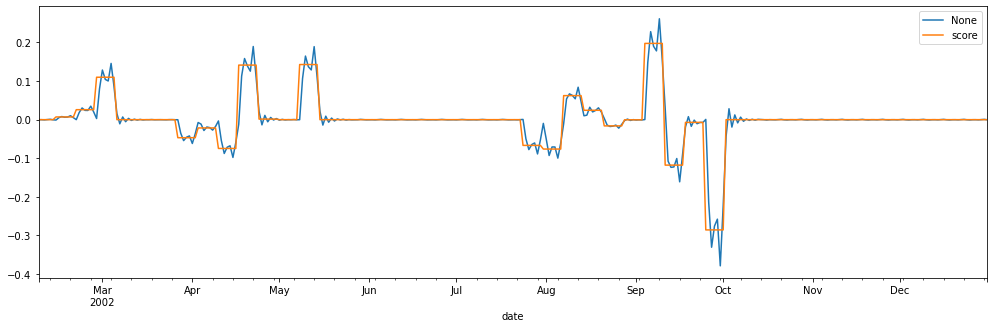

In [28]:
plt.figure(figsize=(17,5))
pred.plot(legend=True)
test.plot(legend=True)